<a href="https://colab.research.google.com/github/Klarisa12/Kelompok-8_Tugas-Besar-Analitik/blob/main/Tubes_Regresi_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Praktikum2/super store1.xlsx')
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,è®°å½•æ•°,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,Delivery_Time
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0,US,1,2011-01-07,CA-2011-130813,...,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0,US,1,2011-01-21,CA-2011-148614,...,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,5
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,1,2011-08-05,CA-2011-118962,...,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,4
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,1,2011-08-05,CA-2011-118962,...,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,4
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0,US,1,2011-09-29,CA-2011-146969,...,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,4


In [ ]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

In [ ]:
df['fast_duration'] = (df['Ship.Date'] - df['Order.Date']).dt.days

In [ ]:
df['delivery_duration'] = (df['fast_duration'] <= 2).astype(int)

In [ ]:
print(df[['Order.Date', 'Ship.Date', 'fast_duration', 'delivery_duration']].head())

  Order.Date  Ship.Date  fast_duration  delivery_duration
0 2011-01-07 2011-01-09              2                  1
1 2011-01-21 2011-01-26              5                  0
2 2011-08-05 2011-08-09              4                  0
3 2011-08-05 2011-08-09              4                  0
4 2011-09-29 2011-10-03              4                  0


In [ ]:
features = ['Ship.Mode', 'Category', 'Region']
df_model = pd.get_dummies(df[features + ['delivery_duration']], drop_first=True)

In [ ]:
x = df_model.drop('delivery_duration', axis=1)
y = df_model['delivery_duration']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[42  2]
 [ 6 10]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.83      0.62      0.71        16

    accuracy                           0.87        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.86      0.87      0.86        60



In [ ]:
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")


Accuracy: 0.87


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

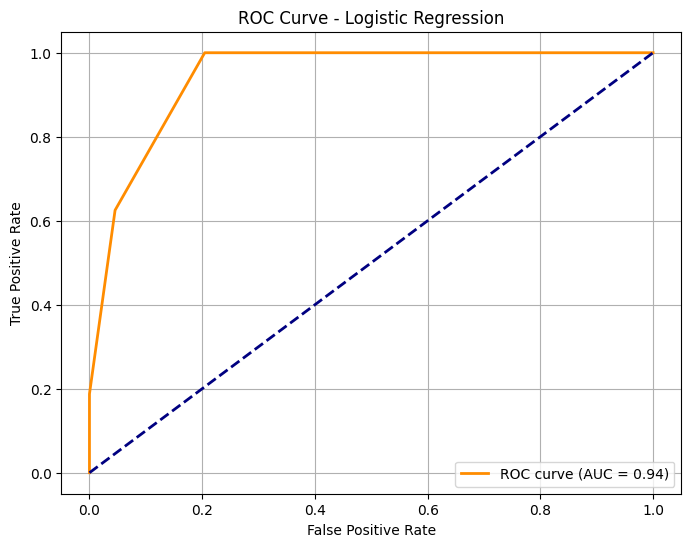

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

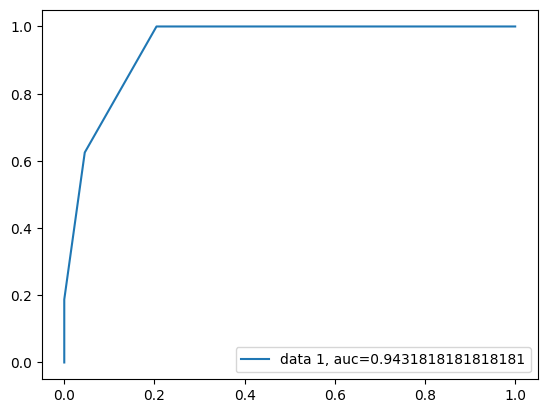

In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as met

y_pred_prob = model.predict_proba(x_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_prob)
auc = met.roc_auc_score(y_test, y_pred_prob)
plt.plot(fp, tp, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
testing1 = pd.DataFrame({
    'Ship.Mode': [20],
    'Category': [1],
    'Region': [1],
    'Sales': [12345],
    'Quantity': [220],
    'Discount': [220],
    'Profit':[380]})
testing1 = pd.DataFrame(testing1)
testing1

,Ship.Mode,Category,Region,Sales,Quantity,Discount,Profit
0,20,1,1,12345,220,220,380


In [ ]:
testing1 = pd.get_dummies(testing1, columns=features, drop_first=True)
missing_cols = set(x.columns) - set(testing1.columns)
for c in missing_cols:
    testing1[c] = 0

In [ ]:
testing1 = testing1[x.columns]
pred_coba = model.predict(testing1)
print('Hasil Prediksi Apakah delivery_duration')
print(pred_coba)

Hasil Prediksi Apakah delivery_duration
[1]
